<a href="https://colab.research.google.com/github/joshbgarfinkel/MachineLearning/blob/main/Assinment%206%20Numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: This Colab notebook accompanies homework assignment 6. You are required to report some answers in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

### Problem 1: Playing with estimators

(e) Numerically generate a set of $N$ samples, $S = \{x_1, \cdots, x_N\}$. Next, generate $M$ such sets $S_1, \cdots, S_M$. For each set of samples $S_i$, compute the MLE estimator $\hat{\theta}_{MLE}$. This will give $M$ different numerical estimates $\hat{\theta}_1, \cdots, \hat{\theta}_M$. Now compute the sample variance of this set of estimates $\{\hat{\theta}_1, \cdots, \hat{\theta}_M\}$. This gives us a numerical estimate $\widehat{\text{Var}}(\hat{\theta}_{MLE})$ of the variance of the MLE, $\text{Var}(\hat{\theta}_{MLE})$. Compare this numerical estimate to the Fisher information. Try different values of $N$ and $M$. For example, try $N = 10$, $M = 1000$; this should give a noisy estimate for $\hat{\theta}_{MLE}$, but since we have a large set $M$ of samples, our variance $\widehat{\text{Var}}(\hat{\theta}_{MLE})$ should be close to the true variance $\text{Var}(\hat{\theta}_{MLE})$.


In [97]:
N = 10 # samples
M = 10000 # sets

theta = 0.5 # mean = 1 /theta
S = np.random.exponential(scale = 1/theta, size = (M,N))
smple_var_mle = np.var(1/np.mean(S,axis=1), ddof=1)
#print(smple_var_mle)

theory_var_mle = N**2 * theta**2 / ((N-1)**2*(N-2))
#print(theory_var_mle)

theory_crlb = theta**2 / N
#print(theory_crlb)

print(f'Estimate of the variance of MLE: {smple_var_mle:0.4f}\nVariance of MLE (from theory): {theory_var_mle:0.4f}\nCRLB (from theory): {theory_crlb:0.4f} ')

Estimate of the variance of MLE: 0.0380
Variance of MLE (from theory): 0.0386
CRLB (from theory): 0.0250 


Task: Plot the variance of $\hat{\theta}_{MLE}$ as a function of number of sets $M$.

(f) Repeat the above problems for the MLE estimator $\hat{\mu}_{MLE}$ of the mean of the Gaussian distribution ${N}(\mu, \sigma^2)$.

In [110]:
N = 10
M = 10000

mean = 2.0
var = 2.0
S = np.random.normal(mean, np.sqrt(var), size = (M,N))


smple_var_mle = np.var(np.mean(S, axis=1), ddof=1)
#print(smple_var_mle)

theory_var_mle = var / N
#print(theory_var_mle)

theory_crlb = var / N
#print(theory_crlb)


print(f'Estimate of the variance of MLE: {smple_var_mle:0.4f}\nVariance of MLE (from theory): {theory_var_mle:0.4f}\nCRLB (from theory): {theory_crlb:0.4f} ')

Estimate of the variance of MLE: 0.2035
Variance of MLE (from theory): 0.2000
CRLB (from theory): 0.2000 


Task: Plot the variance of $\hat{\theta}_{MLE}$ as a function of number of sets $M$.

### Problem 2: Teacher student setup with Gaussian distributed noise

Consider a teacher-student setup, where the teacher generates samples $(x,y)$ with
\begin{align}
y = f^*(x) = (w^*)^T x + \epsilon ,
\end{align}
where $w^*$ is a fixed vector, $x \sim {N}(0, I_{d_{in}})$ and $\epsilon \sim $ ${N}(0,\sigma^2)$. Then, the probability distribution for $y \in \mathbb{R}$ follows ${N}(f^*(x), \sigma^2)$.

Test the lower bound numerically by considering a dataset of $N$ samples, using it to estimate the parameters of the linear model. Plot the average test loss and the Cramer-Rao lower bound for various values of N.

In [410]:
def forward(w, x, var):
    f = x @ w
    eps = np.random.normal(loc = 0, scale = np.sqrt(var), size = f.shape)
    f += eps
    return  f

def mse_loss(y_hat, y):
    "MSE loss"
    return np.mean( (y_hat - y)**2 )

Let us generate some data $(x, y)$ such that

$$y = f(x) = w^* x + \epsilon$$

where $\epsilon \sim N(0, \sigma^2) $ and $x \in N(0, I_{d_{in}}) $.



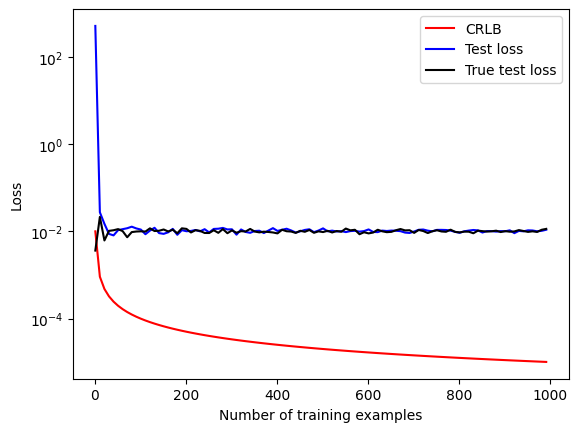

In [412]:
N = np.arange(1,1001,10) #
var = 0.01
d_in = 10
avg_test_loss = []
true_test_loss = []
crlb = []
def exact_solution(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y
np.random.seed(42)
for n in N:
    # data generation
    x_train = np.random.normal(loc = 0, scale = 1.0, size = (n, d_in))
    x_test = np.random.normal(loc = 0, scale = 1.0, size = (n, d_in))
    w_star = np.random.normal(loc = 0, scale = 1.0,  size = (d_in, 1))

    norm = np.linalg.norm(w_star)
    w_star = w_star / norm

    y_train = forward(w_star, x_train, var)
    y_test = forward(w_star, x_test, var)
    # data generation ends

    opt_w = exact_solution(x_train, y_train)

    mean_test_loss = mse_loss((opt_w.T @ x_test.T).T, y_test)
    true_train_loss = mse_loss((w_star.T @ x_train.T).T, y_train)
    crlb0 = var / n

    crlb.append(crlb0)
    avg_test_loss.append(mean_test_loss)
    true_test_loss.append(true_train_loss)

plt.plot(N, crlb, c='r', label='CRLB')
plt.plot(N, avg_test_loss, c='b', label='Test loss')
plt.plot(N, true_test_loss, c='k', label='True test loss')
plt.xlabel('Number of training examples')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.show()

Task: Plot the average test loss and the Cramer-Rao lower bound for various values of N.

### Problem 3: Teacher student setup with exponentially distributed noise

Consider a teacher-student setup, where the teacher generates samples $(x,y)$ with
\begin{align}
y = (w^*)^T x + \epsilon ,
\end{align}
where $\epsilon$ has an exponential distribution, $p(\epsilon) = \frac{1}{2} \theta  e^{- \theta | \epsilon |}$.

In [390]:
def forward_exp(w, x, scale):
    sign = (np.random.normal(size = (N, 1)) > 0)
    eps = sign*np.random.exponential(scale = scale, size = (N, 1)) / 2
    f = x * w + eps
    return  f

N = 1000
scale = 0.1

# data generation
np.random.seed(43)

x_train = np.random.uniform(low = -1.0, high = 1.0, size = (N, 1))
w_star = np.random.normal(size = 1)

y_train = forward_exp(w_star, x_train, scale)

# data generation ends


(a) Perform linear regression assuming a MSE loss, and compute the generalization error.

In [400]:
def exact_solution(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y
w_exact = exact_solution(x_train, y_train)
print(w_exact.shape)

# test data generation
x_test = np.random.uniform(low=-1.0, high=1.0, size=(N, 1))
y_test = forward_exp(w_star, x_test, scale)


train_loss_mse = mse_loss((w_exact.T @ x_train.T).T, y_train)
print(f'Train loss (MSE): {train_loss_mse:0.4f}')

test_loss_mse = mse_loss((w_exact.T @ x_test.T).T, y_test)
print(f'Test loss (MSE): {test_loss_mse:0.4f}')

(1, 1)
Train loss (MSE): 0.0030
Test loss (MSE): 0.0025


(c)  Now perform linear regression using the loss derived from maximum likelihood, and compute the generalization error. Hint: Use sub-gradient decent.

How does the generalization error, in this case, compare to the case where MSE loss was used?

In [408]:
def MLE(y_hat, y):
    return np.mean(np.abs(y_hat - y))

def subgradient_descent(x0, lr, max_iter):
    x = x0
    for k in range(max_iter):
        g = np.sign(x)
        x = x - alpha * g

    return x
def l1_norm(x):
    return np.sum(np.abs(x))

def l1_subgradient(x):
    return np.sign(x)
lr = 0.001
iter = 1000
x_opt = subgradient_descent(l1_norm, l1_subgradient, x_train, lr, iter)


''' w = np.random.normal(size=(1,))
losses = []
for _ in range(iter):
    w = sub_grad(x_train, y_train, w, lr)
    loss = MLE(x_train @ w, y_train)
    losses.append(loss) '''

''' x_test = np.random.uniform(low=-1.0, high=1.0, size=(N, 1))
y_test = forward_exp(w_star, x_test, scale)


y_train_pred = x_train @ w
y_test_pred = x_test @ w


train_loss_mle = MLE(y_train_pred, y_train)
print(f'Train loss (MLE): {train_loss_mle:0.4f}')
test_loss_mle = MLE(y_test_pred, y_test)
print(f'Test loss (MLE): {test_loss_mle:0.4f}')
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show() '''

TypeError: 'float' object is not callable

### Problem 4: Family of estimators

We saw that the naive sample variance $\hat{\sigma}^2_{naive} = \frac{1}{N} \sum_{i=1}^N (X_i - (\frac{1}{N}\sum_{i=1}^N X_i))^2$ is a biased estimator of the sample variance. Then we saw that an unbiased estimator of the variance includes the Bessel correction, $\hat{\sigma}^2_{unbiased} = \frac{1}{N-1} \sum_{i=1}^N (X_i - (\frac{1}{N}\sum_{i=1}^N X_i))^2$. But just because it is unbiased, is it the best that we can do? Let us consider a family of estimators
\begin{align}
    \hat{\sigma}^2_A = \frac{1}{A} \sum_{i=1}^N \left(X_i - \left(\frac{1}{N}\sum_{i=1}^N X_i \right ) \right)^2 .
\end{align}

Suppose that we want an estimator $\hat{\sigma}^2_A$ that minimizes the mean squared error $\mathbb{E}[(\hat{\sigma}_A^2 - \sigma^2)^2 ]$. For normally distributed random numbers, $X \sim {N}(0, \sigma^2)$, find the optimal value of $A$ numerically.

Optimal value of A: 11


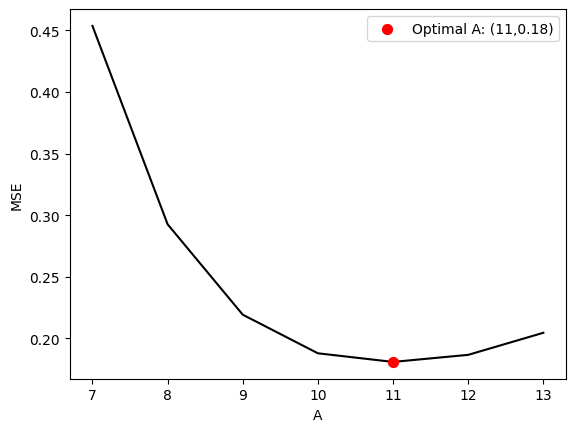

In [237]:
N = 10 # Size of the sample
M = 10000 # Number of samples
var = 1.0 # variance of the Gaussian distribution
np.random.seed(24)

Avalues = N + np.arange(-3, 4)
error = []
for A in Avalues:
    mseRT = 0
    for _ in range(M):
        X = np.random.normal(0, np.sqrt(var), N)
        sample_variance = (1 / A) * np.sum((X - np.mean(X)) ** 2)
        mseRT += (sample_variance - var) ** 2
    error.append(mseRT / M)

plt.plot(Avalues, error, c='k', zorder=0)
plt.xlabel('A')
plt.ylabel('MSE')

opt_A = Avalues[np.argmin(error)]
print(f"Optimal value of A: {opt_A}")

plt.scatter(opt_A, np.min(error), c='r', s=50, label=f'Optimal A: ({opt_A},{min(error):0.2f})',zorder=1)
plt.legend()
plt.show()

### Problem 5: James-Stein estimator

The James-Stein estimator is an estimator for the mean of a multi-variate Gaussian distribution. More specifically, let $X$ be an $m$-component random variable, meaning $X$ takes values in $\mathbb{R}^m$. The $m$-dimensional Gaussian distribution is
\begin{align}
    p(x) = (2\pi \sigma^2)^{-m/2} e^{- \frac{||x - \mu||^2}{2\sigma^2}} .
\end{align}
The mean is an $m$-component vector $\mu \in \mathbb{R}^m$, and we take the covariance matrix to be diagonal, with $\sigma^2$ the variance of each component. $|| \cdot ||$ refers to the $L_2$ norm.

The formula for the James-Stein estimator is
\begin{align}
    \hat{\mu}_{JS} = \left(1 - \frac{(m-2) \sigma^2}{||X||^2}\right) X.
\end{align}


Generate a sample of $X$ and compute the JS estimator numerically. Now generate $N$ such samples. Using the estimator of the variance $\hat{\sigma}^2$ instead of $\sigma^2$ in Eqn. \ref{eqn:js}, show empirically that, on average, the James-Stein estimator is closer to the true mean than the MLE.

Task: Plot the mean-squared errors, $\mathbb{E} (\mu_{MLE}) - \mu)^2$ and $\mathbb{E} (\mu_{JS}) - \mu)^2$, as a function of the dimension $m$.

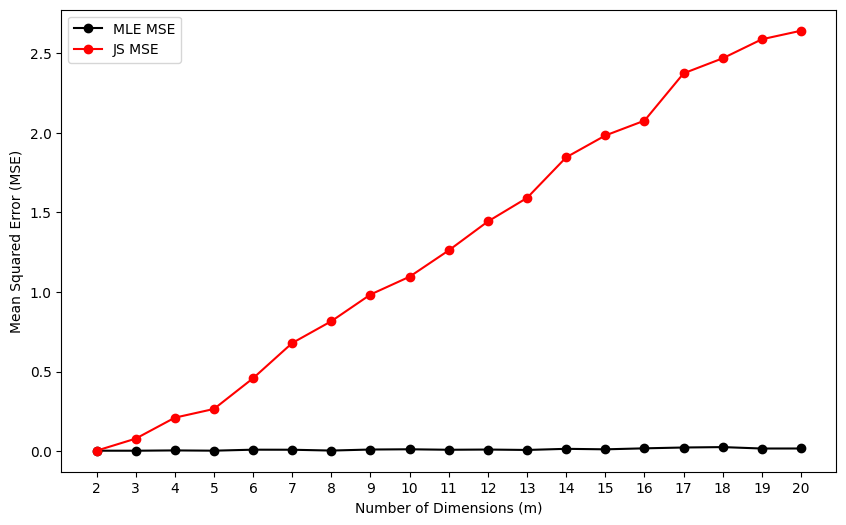

In [325]:
N = 1000
var = 1.0

def muJS(x, m, sigma):
    T0 = np.linalg.norm(x) ** 2
    T1 = 1 - ((m - 2) * sigma ** 2 / T0) if T0 > 0 else 0
    return T1 * x

mrange = np.arange(2, 21)
sigma = np.sqrt(var)


mle_mse_values = []
js_mse_values = []

for m in mrange:
    mu_true = np.ones(m)*0.5
    X = np.random.normal(mu_true, sigma, size=(N, m))
    mu_mle = np.mean(X, axis=0)
    sample_var = np.var(X, axis=0, ddof=1)

    mse_mle = np.mean(np.linalg.norm(mu_mle - mu_true)**2)
    mle_mse_values.append(mse_mle)

    js_estimates = np.zeros_like(mu_mle)
    for i in range(N):
        x = X[i, :]
        mu_js = muJS(x, m, sample_var)
        js_estimates += mu_js

    js_estimates /= N
    mse_js = np.mean(np.linalg.norm(js_estimates - mu_true)**2)
    js_mse_values.append(mse_js)


plt.figure(figsize=(10, 6))
plt.plot(mrange, mle_mse_values, label='MLE MSE', marker='o', c='k')
plt.plot(mrange, js_mse_values, label='JS MSE', marker='o', c='r')
plt.xlabel('Number of Dimensions (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(mrange)
plt.legend()
plt.show()

### Problem 6: Experimenting with bias and variance for polynomial regression

In this problem, we will compute the bias and variance in the polynomial regression problem with samples ($x, y$) generated using the relation

\begin{align}
   y = 2x^3 - x^2 + x + 1 +  \eta,  
\end{align}

where $\eta \sim N(0, 1)$ is random noise.

Randomly generate a training dataset $S$ of size $N$ and a test example $(x', y')$.
Fit a $p$ degree polynomial, $f_{p, S}(x)$, to the randomly generated set $S$ and evaluate it on the test example $(x', y')$. Repeat this process $K$ times and estimate the bias $\left(\mathbb{E}_{S, (x', y')} [f_{p, S}(x') - y'] \right) ^2 $ and variance $\mathbb{E}_{S, (x', y')} [ f_{p, S}(x') - \mathbb{E}_{S, (x', y')} f_{p, S}(x')  ]^2$. Repeat this for different values of $p$. Plot the bias, variance, and test loss as a function of the degree $p$.


In [328]:
"Generate datset with a cubic relationship between X and Y"

def cubic_func(x, n_samples):
    y = 2*(x**3) - x**2 +  x + 1
    return y + np.random.randn(n_samples, 1)

def generate_cubic_dataset(N, M):
    #Generate training dataset
    x_train = np.random.uniform(low = -1.0, high = 1.0, size = (N, 1))
    y_train = cubic_func(x_train, N)

    #Generate test dataset
    x_test = np.random.uniform(low = -1.1, high = 1.1, size = (M, 1) )
    y_test = cubic_func(x_test, M)

    return (x_train, y_train), (x_test, y_test)

def mse(y, y_preds):
    return np.mean( (y - y_preds)**2 )


In [345]:
np.random.seed(43)
N = 100 #number of training examples
M = 1 #number of test examples
K = 10**4 # number of averages

results = list()


for p in range(1, 11):
    f_vals = []
    print('Degree: ', p)

    for k in range(K):

        (x_train, y_train), (x_test, y_test) = generate_cubic_dataset(N, M)
        coeffs = np.polyfit(x_train.flatten(), y_train.flatten(), p)

        y_preds = np.polyval(coeffs, x_test)
        y_preds_test = np.polyval(coeffs, x_test)

        f_vals.append(y_preds_test)

    f_vals = np.array(f_vals).flatten()
    y_test_true = cubic_func(x_test, M).flatten()

    bias_squared = (np.mean(f_vals) - np.mean(y_test_true)) ** 2
    variance = np.mean((f_vals - np.mean(f_vals)) ** 2)
    y_preds_train = np.polyval(coeffs, x_train)
    train_loss = mse(y_train, y_preds_train)
    test_loss = mse(y_test_true, f_vals)
    results.append((p, bias_squared, variance, train_loss, test_loss))




results = np.array(results)

df = pd.DataFrame(results, columns = ['p', 'bias', 'variance', 'train_loss', 'test_loss'])
print(df)


Degree:  1
Degree:  2
Degree:  3
Degree:  4
Degree:  5
Degree:  6
Degree:  7
Degree:  8
Degree:  9
Degree:  10
      p       bias   variance  train_loss  test_loss
0   1.0   0.005171   1.964014    1.338086   1.969185
1   2.0  10.392508   2.057616    0.975078  12.450124
2   3.0   0.000678   2.797345    0.967763   2.798023
3   4.0   0.727660   2.811097    1.071739   3.538758
4   5.0   4.555463   2.833998    0.721518   7.389461
5   6.0   0.070003   3.061908    0.952928   3.131910
6   7.0   0.181020   3.489698    0.890326   3.670718
7   8.0   0.732533   4.460230    0.919384   5.192764
8   9.0   0.018129   5.261584    0.790935   5.279713
9  10.0   0.152851  10.836568    0.900708  10.989419


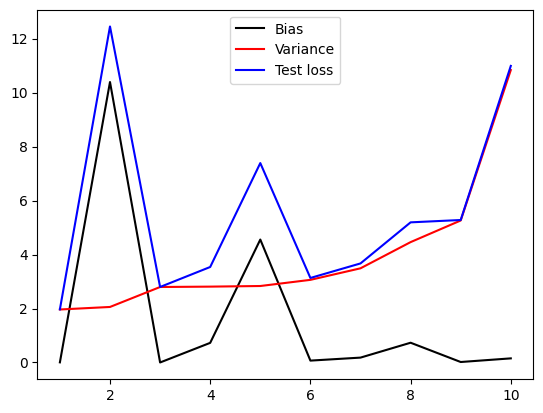

In [340]:
plt.plot(df['p'], df['bias'], label = 'Bias', c='k')
plt.plot(df['p'], df['variance'], label = 'Variance', c='r')
plt.plot(df['p'], df['test_loss'], label = 'Test loss', c='b')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel('Loss')
plt.show()

Task: Plot the bias, variance and the test loss as a function of the degree of the polynomial.

### Problem 7: Sample-wise Double descent in linear regression

In this problem, we will demonstrate the sample-wise double descent phenomenon for linear regression for synthetic dataset consisting of $(x, y)$ pairs related as

\begin{align}
  y = W x + \epsilon,  
\end{align}

where $x \sim \mathcal{N}(0, I_{d_{in}})$ , $ \epsilon \sim \mathcal{N}(0, \sigma^2)$ with $\sigma = 0.1$.

Generate subsets of the training dataset of size $n$ and fit a linear model to this subset using the exact solution to linear regression with MSE loss. Next, plot the test loss as a function of  $n$ , and mark the underparameterized and overparameterized regimes.


In [346]:
def generate_dataset(seed, dims, n_samples):
    """Generates random data"""
    d_in, d_out = dims
    np.random.seed(seed)
    #generate a fixed w
    w = np.random.normal(loc = 0, scale = 1.0, size = (d_in, d_out))
    norm_w = np.linalg.norm(w, axis = 0)
    w = w / norm_w

    #generate input examples for the test and training dataset
    #x_train = np.random.uniform(low = -1.0, high = 1.0, size = (n_samples, d_in))
    x_train = np.random.multivariate_normal(mean = np.zeros(d_in), cov = np.eye(d_in), size = (n_samples, ))


    #x_test = np.random.uniform(low = -1.0, high = 1.0, size = (n_samples, d_in))
    x_test = np.random.multivariate_normal(mean = np.zeros(d_in), cov = np.eye(d_in), size = (n_samples, ))

    # generate outputs
    y_train = x_train @ w
    y_train +=  np.random.normal(loc = 0.0, scale = 0.1, size = y_train.shape)
    y_test = x_test @ w
    y_test +=  np.random.normal(loc = 0.0, scale = 0.1, size = y_train.shape)

    return (x_train, y_train), (x_test, y_test), w



Let us generate a dataset consisting of $N = 1500$ examples and $d_{in}=10$.

In [347]:
d_in = 1000
d_out = 1
n_samples = 1500

(x_train, y_train), (x_test, y_test), w_star = generate_dataset(seed = 42, dims = (d_in, d_out), n_samples = n_samples)

Task: Generate subsets of the training dataset of size $n$, fit a linear model to the subset using an exact solution.

In [375]:
n_values = np.arange(500, n_samples+1, 10), np.arange(d_in -10 + 1, d_in, 1), np.arange(d_in + 1, d_in + 10, 1)
n_values = np.concatenate(n_values)

results = list()

def exact_solution(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y

for n in tqdm(n_values):
    #create a subset of X
    x, y = x_train[:n, :], y_train[:n, :]
    sol = exact_solution(x, y).flatten()

    train_vals = x_train @ sol
    train_loss = mse(train_vals, y_train)

    test_vals = x_test @ sol
    test_loss = mse(test_vals, y_test)


    bias_weights = (np.mean(x_test) - np.mean(y_test))
    var_weights = np.mean((sol - np.mean(sol)) ** 2)
    results.append((n+1, train_loss, test_loss, bias_weights, var_weights))


results = np.array(results)


100%|██████████| 119/119 [00:45<00:00,  2.59it/s]


Task: Next, plot the test loss as a function of $n$, and mark the underparameterized and overparameterized regimes.

(-0.1, 5.0)

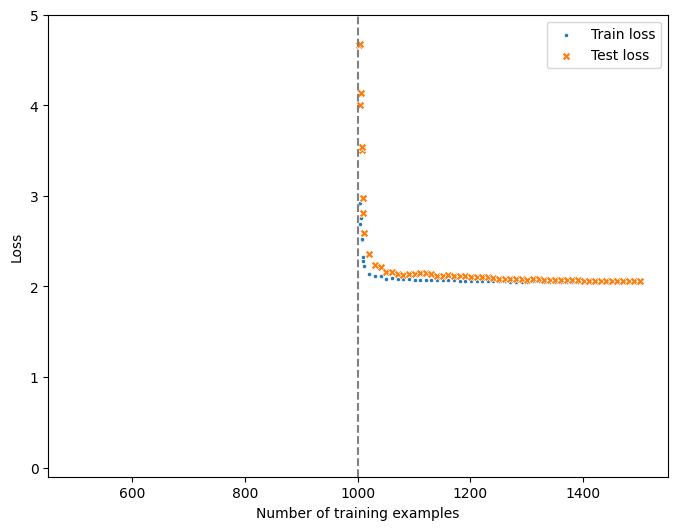

In [376]:


df = pd.DataFrame(results, columns = ['n', 'train_loss', 'test_loss', 'bias_weights', 'var_weights'])

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax = sns.scatterplot(x = 'n', y = 'train_loss', data = df, label = 'Train loss', ax = ax, marker = '.')
ax = sns.scatterplot(x = 'n', y = 'test_loss', data = df, label = 'Test loss', ax = ax, marker = 'X')
ax.axvline(x = d_in, linestyle = 'dashed', color = 'gray')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Loss')
ax.set_ylim(-0.1, 5)

We observe a sharp peak in the test loss at $n=d_{in}= 1000$.